In [24]:
#importing necessary libraries for the project
import pandas as pd
import numpy as np
import os
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing the dataset
data = pd.read_csv('hrdata.csv', header=0, encoding= 'ANSI', sep=',')

In [3]:
data.describe()

,EmployeeCount,EmployeeID,Age,JobLevel,Hourlyrate,Income,Salaryhike,Workex,YearsSinceLastPromotion,TrainingTimesLastYear
count,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1.0,1024.865306,36.923810,2.063946,65.891156,6502.931293,15.209524,11.279592,2.187755,2.799320
std,0.0,602.024335,9.135373,1.106940,20.329428,4707.956783,3.659938,7.780782,3.222430,1.289271
min,1.0,1.000000,18.000000,1.000000,30.000000,1009.000000,11.000000,0.000000,0.000000,0.000000
25%,1.0,491.250000,30.000000,1.000000,48.000000,2911.000000,12.000000,6.000000,0.000000,2.000000
50%,1.0,1020.500000,36.000000,2.000000,66.000000,4919.000000,14.000000,10.000000,1.000000,3.000000
75%,1.0,1555.750000,43.000000,3.000000,83.750000,8379.000000,18.000000,15.000000,3.000000,3.000000
max,1.0,2068.000000,60.000000,5.000000,100.000000,19999.000000,25.000000,40.000000,15.000000,6.000000


In [4]:
data

,EmployeeCount,EmployeeID,Department,JobRole,Attrition,Gender,Age,MaritalStatus,Education,EducationField,...,Hourlyrate,Income,Salaryhike,OverTime,Workex,YearsSinceLastPromotion,EmpSatisfaction,TrainingTimesLastYear,WorkLifeBalance,Performance_Rating
0,1,1,Sales,Sales Executive,Yes,Female,41,Single,College,Life Sciences,...,94,5993,11,Yes,8,0,Medium,0,Bad,Excellent
1,1,2,Research & Development,Research Scientist,No,Male,49,Married,Below College,Life Sciences,...,61,5130,23,No,10,1,High,3,Better,Outstanding
2,1,4,Research & Development,Laboratory Technician,Yes,Male,37,Single,College,Other,...,92,2090,15,Yes,7,0,Very High,3,Better,Excellent
3,1,5,Research & Development,Research Scientist,No,Female,33,Married,Master,Life Sciences,...,56,2909,11,Yes,8,3,Very High,3,Better,Excellent
4,1,7,Research & Development,Laboratory Technician,No,Male,27,Married,Below College,Medical,...,40,3468,12,No,6,2,Low,3,Better,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,2061,Research & Development,Laboratory Technician,No,Male,36,Married,College,Medical,...,41,2571,17,No,17,0,High,3,Better,Excellent
1466,1,2062,Research & Development,Healthcare Representative,No,Male,39,Married,Below College,Medical,...,42,9991,15,No,9,1,Very High,5,Better,Excellent
1467,1,2064,Research & Development,Manufacturing Director,No,Male,27,Married,Bachelor,Life Sciences,...,87,6142,20,Yes,6,0,Medium,0,Better,Outstanding
1468,1,2065,Sales,Sales Executive,No,Male,49,Married,Bachelor,Medical,...,63,5390,14,No,17,0,Very High,3,Good,Excellent


In [5]:
#specifying the target variable
y = data.Performance_Rating

In [6]:
#Create X
features = ['Department','JobRole','Attrition','Gender','Age','MaritalStatus','Education','EducationField','Hourlyrate','Income','Salaryhike','OverTime','YearsSinceLastPromotion','EmpSatisfaction','TrainingTimesLastYear','WorkLifeBalance']
X = data[features]

In [7]:
#spliting dataset for training and testing
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state = 0)

In [8]:
#taking out numerical and categorical columns
categorical_col = [col for col in train_X.columns 
                  if train_X[col].nunique() < 10 and
                  train_X[col].dtype == "object"]
numerical_col = [col for col in train_X.columns
                if train_X[col].dtype in ('int64','float64')]

In [9]:
#preprocessing numerical data
numerical_transformer = SimpleImputer(strategy = 'constant')

In [10]:
#Preprocessing for Categorical data
categorical_transformer = Pipeline(steps = [ 
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
     ('Onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ])

In [11]:
#Bundle for preprocessing of numerical and categorical data
preprocessor = ColumnTransformer(transformers = [
    ('num', numerical_transformer, numerical_col),
    ('cat', categorical_transformer, categorical_col)
])

### RandomForestClassifier

In [12]:
#Model
model = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [13]:
#Bundle of preprocessor and the model
my_pipeline = Pipeline( steps = [
    ('preprocessor', preprocessor),
    ('model', model)
])

In [14]:
#Fit train_X, train_y to the model
my_pipeline.fit(train_X, train_y)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='constant',
                                                                verbose=0),
                                                  ['Age', 'Hourlyrate',
                                                   'Income', 'Salaryhike',
                                                   'YearsSinceLastPromo

In [15]:
#Prediction
preds = my_pipeline.predict(val_X)

In [16]:
#Evaluation using accuracy metrics from sklearn
score = accuracy_score(val_y, preds)
print('Accuracy of the model is:', score)

Accuracy of the model is: 1.0


In [17]:
#Evaluation using cross validation score
cv_scores = cross_val_score(my_pipeline, train_X, train_y,
                           cv = 5,
                           scoring = 'accuracy')
print("Cross validation score:%f" % cv_scores.mean())

Cross validation score:1.000000


Text(0.5, 1.0, 'Random classifier score on employee performance rating')

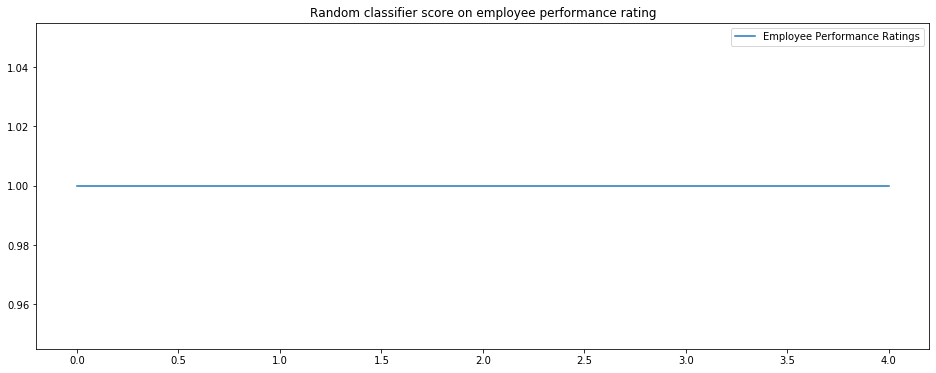

In [31]:
#Visualizing cv_scores through 
plt.figure(figsize = (16,6))
sns.lineplot(data = cv_scores, label = "Employee Performance Ratings")
plt.title("Random classifier score on employee performance rating")


### KNeighborsClassifier

In [18]:
#Trying KNeighborsClassifiers for the predictions

model2 = KNeighborsClassifier(n_neighbors = 5)

In [19]:
#Pipeline for KNN
pipeline_knn = Pipeline( steps = [
    ('preprocessor', preprocessor),
    ('model', model2)
])

In [20]:
#fit for knn
pipeline_knn.fit(train_X, train_y)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='constant',
                                                                verbose=0),
                                                  ['Age', 'Hourlyrate',
                                                   'Income', 'Salaryhike',
                                                   'YearsSinceLastPromo

In [21]:
#predictions for knn
preds_knn = pipeline_knn.predict(val_X)

In [22]:
#Evaluating KNN's accuracy on this dataset
score_knn = accuracy_score(val_y, preds_knn)
print("Accuracy score using knn is: %f" % score_knn)

Accuracy score using knn is: 0.834239


In [32]:
#Cross-validation for KNN
cv_scores_knn = cross_val_score(pipeline_knn, train_X, train_y,
                               cv = 5,
                               scoring = 'accuracy')
print("Cross-validation score for KNN:%f"%cv_scores_knn.mean())

Cross-validation score for KNN:0.841193


Text(0.5, 1.0, 'KNN score on Employee performance rating')

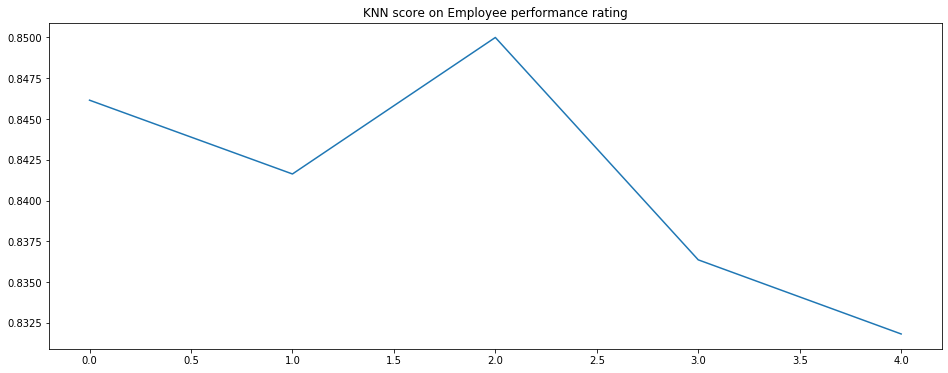

In [33]:
#plotting KNN CV scores on a line plot
plt.figure(figsize = (16,6))
sns.lineplot(data = cv_scores_knn)
plt.title("KNN score on Employee performance rating")